In [1]:
import numpy as np
import pandas as pd
import copy
import time
import matplotlib.pyplot as plt

In [2]:
def get_accuracy(X, y):
  correct = 0
  for i in range(len(X)):
    trainX = np.concatenate((X[:i], X[i+1:]))
    trainy = np.concatenate((y[:i], y[i+1:]))
    dist = np.linalg.norm(trainX - X[i], axis=1)
    nnind = np.argmin(dist)
    pred = trainy[nnind]
    if pred == y[i]:
      correct += 1
  accuracy = round((correct / len(X)) * 100, 2)
  return accuracy

In [3]:
def forward_selection(data):
  cols = [i for i in range(1, len(data.columns))]
  absolute_best = (0,None)
  selected_cols = []
  ch = 0
  y = data.iloc[:, :1].values
  X_full = data.iloc[:, :].values
  plotX = []
  plotY= []

  while len(selected_cols) < len(cols):
    best = (0, None)
    for i in cols:
      if i in selected_cols:
        continue

      if selected_cols:
        selected_ind = [i]+selected_cols
      else:
        selected_ind = [i]

      X = X_full[:, selected_ind]
      acc = get_accuracy(X, y)
      print(f'The accuracy selecting {selected_ind} items is {acc:.2f}%')

      if acc > best[0]:
        best = (acc, i)

    selected_cols.append(best[1])
    print(f'Adding {best[1]} to selected features the accuracy is {best[0]:.2f}%')
    plotX.append(len(selected_cols))
    plotY.append(best[0])
    if best[0]>absolute_best[0]:
      absolute_best = (best[0], copy.deepcopy(selected_cols))
    elif ch==0:
      ch = 1
      print('The accuracy is not increasing, continuing search anyway in case of local maxima.')
  print(f'The highest accuracy of {absolute_best[0]:.2f}% is observed with {absolute_best[1]} elements.')
  plt.plot(plotX, plotY, marker='.', linestyle='-')
  plt.ylabel('Accuracy')
  # plt.xticks(rotation=90)
  plt.xlabel('Selected Features')
  plt.title('Forward Selection')
  plt.show()

In [7]:
def backward_elimination(data):
  cols = [i for i in range(1, len(data.columns))]
  absolute_best = (0,None)
  selected_cols = copy.deepcopy(cols)
  removed_cols =[]
  ch = 0
  y = data.iloc[:, :1].values
  X_full = data.iloc[:, :].values
  plotX =[]
  plotY =[]

  while len(selected_cols) != 0:
    best = (0, None)
    for i in cols:
      if i in removed_cols:
        continue

      selected_ind = selected_cols.copy()
      selected_ind.remove(i)
      X = X_full[:, selected_ind]
      acc = get_accuracy(X, y)
      print(f'The accuracy with {selected_ind} items is {acc:.2f}%')

      if acc > best[0]:
        best = (acc, i)

    selected_cols.remove(best[1])
    removed_cols.append(best[1])
    print(f'Removing {best[1]} the highest accuracy of {best[0]:.2f}%')
    plotX.append(len(selected_cols))
    plotY.append(best[0])
    if best[0]>absolute_best[0]:
      absolute_best = (best[0], copy.deepcopy(selected_cols))
    elif ch==0:
      ch = 1
      print('The accuracy is not increasing, continuing search anyway in case of local maxima.')
  print(f'The highest accuracy of {absolute_best[0]:.2f}% is observed with {absolute_best[1]} elements.')
  plt.plot(plotX, plotY, marker='.', linestyle='-')
  plt.ylabel('Accuracy')
  # plt.xticks(rotation=90)
  plt.xlabel('Selected Features')
  plt.title('Backward Elimination')
  plt.show()

Welcome to Achala's Feature Selection Algorithm
---------------------------------------------------------------------------------------------------------------------
Select one of the dataset options:
1. Small dataset (CS205_small_Data_39)
2. Large dataset (CS205_large_Data_45)
3. Exit Program
1
Select one of the following options:
1. Forward Selection
2. Backward Elimination
3. Exit Program
1
Starting Feature Selection algorithm with the below configurations:
1. Small dataset 500 samples and 12 features
2. Forward Selection
The accuracy selecting [1] items is 68.40%
The accuracy selecting [2] items is 70.80%
The accuracy selecting [3] items is 72.00%
The accuracy selecting [4] items is 76.20%
The accuracy selecting [5] items is 75.60%
The accuracy selecting [6] items is 82.40%
The accuracy selecting [7] items is 72.80%
The accuracy selecting [8] items is 71.00%
The accuracy selecting [9] items is 73.40%
The accuracy selecting [10] items is 71.40%
The accuracy selecting [11] items is 7

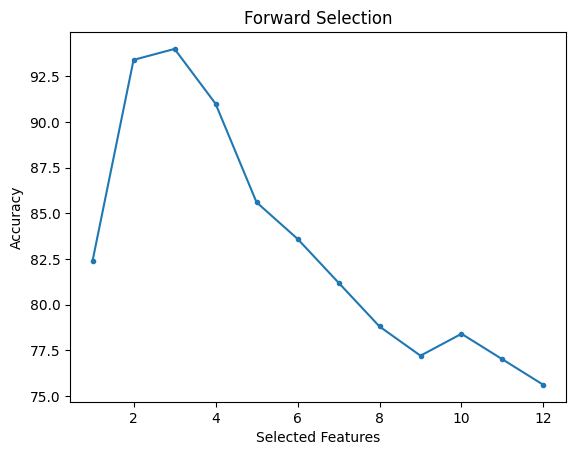

Execution time: 1.32 seconds
---------------------------------------------------------------------------------------------------------------------
Select one of the dataset options:
1. Small dataset (CS205_small_Data_39)
2. Large dataset (CS205_large_Data_45)
3. Exit Program
1
Select one of the following options:
1. Forward Selection
2. Backward Elimination
3. Exit Program
2
Starting Feature Selection algorithm with the below configurations:
1. Small dataset 500 samples and 12 features
2. Backward Elimination
The accuracy with [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] items is 74.20%
The accuracy with [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] items is 71.20%
The accuracy with [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12] items is 75.00%
The accuracy with [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12] items is 75.00%
The accuracy with [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12] items is 74.60%
The accuracy with [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12] items is 72.40%
The accuracy with [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12] item

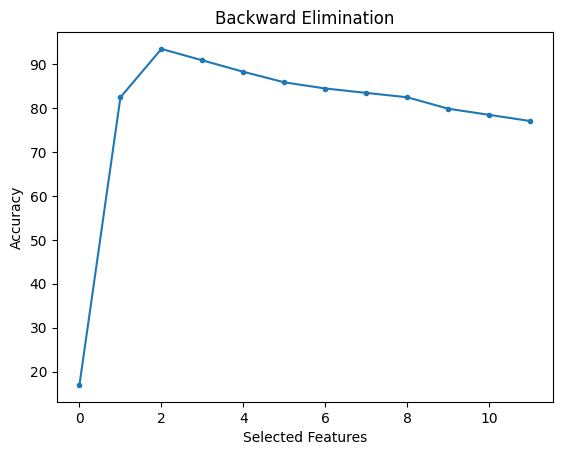

Execution time: 1.5 seconds
---------------------------------------------------------------------------------------------------------------------
Select one of the dataset options:
1. Small dataset (CS205_small_Data_39)
2. Large dataset (CS205_large_Data_45)
3. Exit Program
2
Select one of the following options:
1. Forward Selection
2. Backward Elimination
3. Exit Program
1
Starting Feature Selection algorithm with the below configurations:
1. Large dataset 5000 samples and 50 features
2. Forward Selection
The accuracy selecting [1] items is 69.30%
The accuracy selecting [2] items is 68.06%
The accuracy selecting [3] items is 70.08%
The accuracy selecting [4] items is 69.22%
The accuracy selecting [5] items is 69.84%
The accuracy selecting [6] items is 68.42%
The accuracy selecting [7] items is 67.68%
The accuracy selecting [8] items is 70.04%
The accuracy selecting [9] items is 69.74%
The accuracy selecting [10] items is 68.26%
The accuracy selecting [11] items is 68.40%
The accuracy 

In [ ]:
print('Welcome to Achala\'s Feature Selection Algorithm')
exitch = 0
while exitch ==0:
  print('---------------------------------------------------------------------------------------------------------------------')
  print('Select one of the dataset options:')
  print('1. Small dataset (CS205_small_Data_39)')
  print('2. Large dataset (CS205_large_Data_45)')
  print('3. Exit Program')
  datach = int(input())
  if datach == 1:
    data = pd.read_csv('CS205_small_Data__39.txt', sep='  ', header=None, engine='python')
  elif datach == 2:
    data = pd.read_csv('CS205_large_Data__45.txt', sep='  ', header=None, engine='python')
  elif datach == 3:
    exitch = 1
    continue
  else:
    print('Invalid input')
    continue

  print('Select one of the following options:')
  print('1. Forward Selection')
  print('2. Backward Elimination')
  print('3. Exit Program')
  selch = int(input())

  print('Starting Feature Selection algorithm with the below configurations:')
  if datach == 1:
    print('1. Small dataset '+str(data.shape[0])+' samples and '+str(data.shape[1]-1)+' features')
  elif datach == 2:
    print('1. Large dataset '+str(data.shape[0])+' samples and '+str(data.shape[1]-1)+' features')

  if selch == 1:
    print('2. Forward Selection')
    start = time.time()
    forward_selection(data)
    end = time.time()
    print('Execution time: '+str(round((end-start), 2))+' seconds')
  elif selch == 2:
    start = time.time()
    print('2. Backward Elimination')
    backward_elimination(data)
    end = time.time()
    print('Execution time: '+str(round((end-start), 2))+ ' seconds')
  elif selch == 3:
    exitch = 1